In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.duplicated().sum()

165

In [9]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


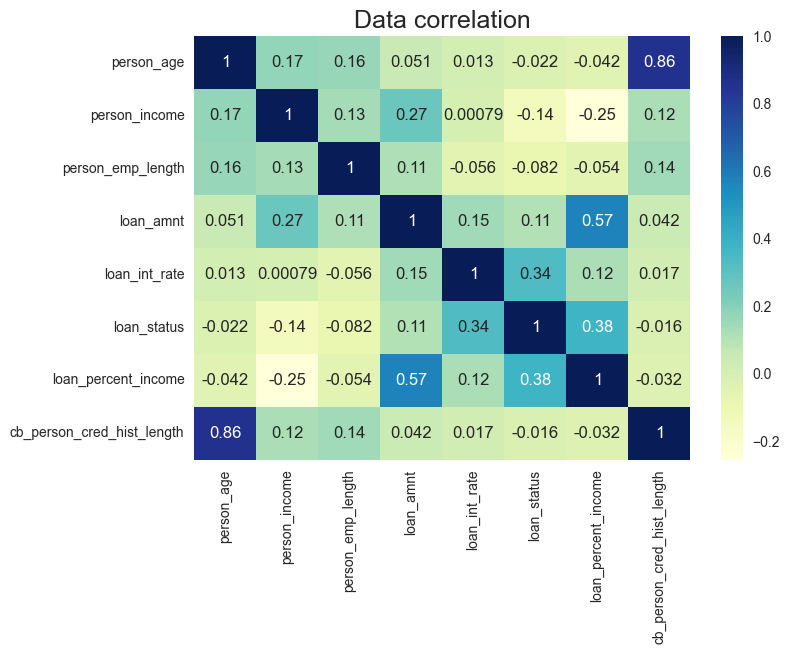

In [11]:
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', annot=True)
plt.title('Data correlation', fontsize=18)
plt.show()

Text(0.5, 1.0, 'Loan Status')

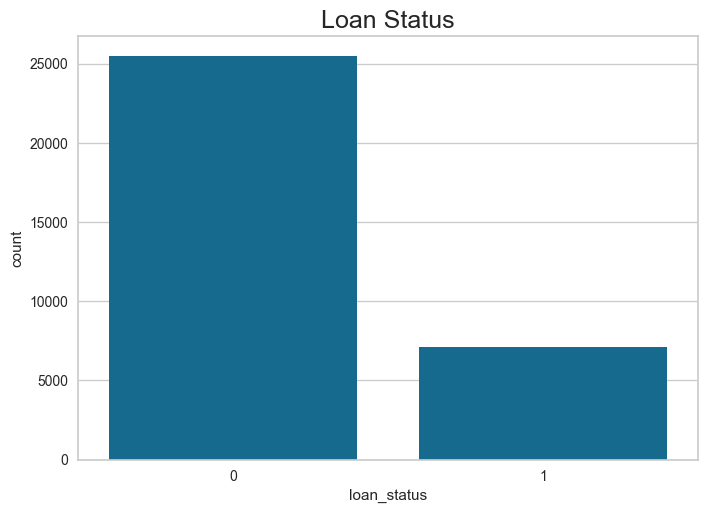

In [12]:
sns.countplot(x=df['loan_status'])
plt.title('Loan Status', fontsize=18)

Text(0.5, 1.0, 'Home ownership')

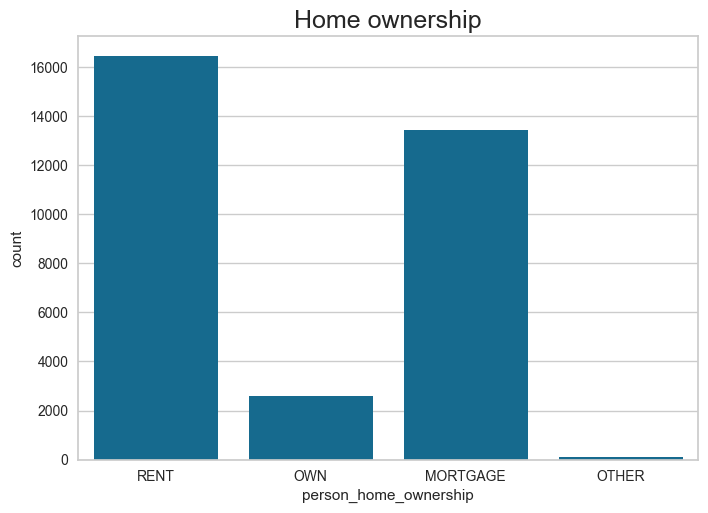

In [13]:
sns.countplot(x=df['person_home_ownership'])
plt.title('Home ownership', fontsize=18)

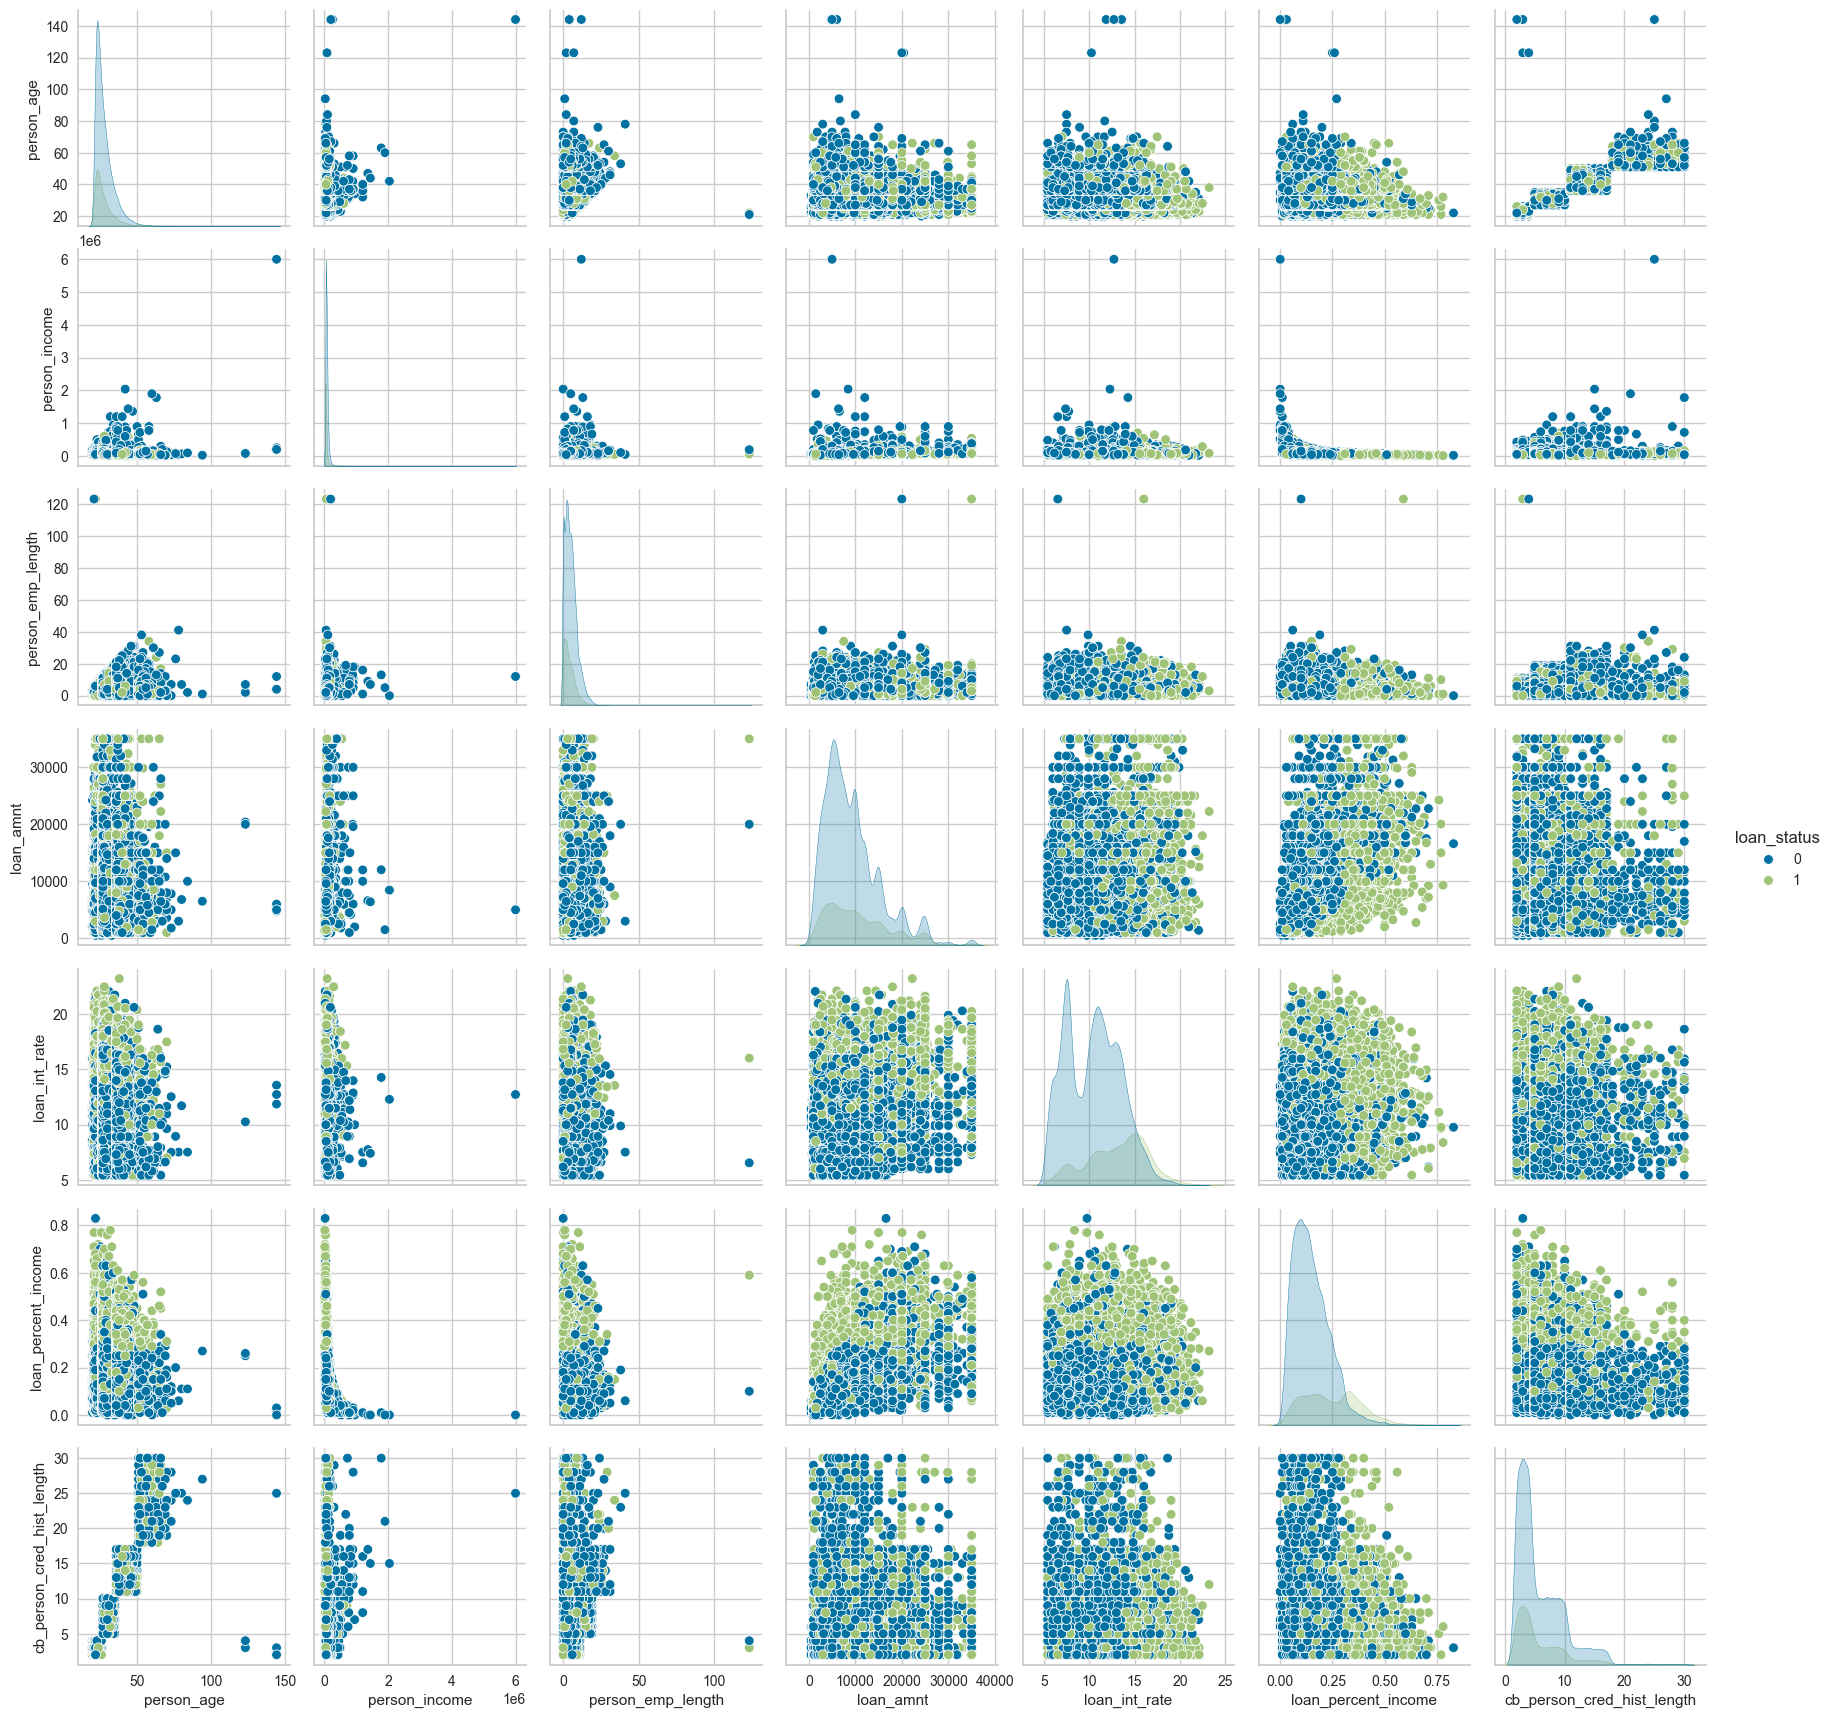

In [14]:
sns.pairplot(df, hue='loan_status')

In [15]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [16]:
df.loc[df['loan_int_rate'].isnull(), 'loan_int_rate'] = df['loan_int_rate'].median()
df.loc[df['person_emp_length'].isnull(), 'person_emp_length'] = df['person_emp_length'].median()

In [17]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [18]:
df['person_age'].max()

144

In [19]:
df = df.loc[df['person_age'] < 90]

In [20]:
df['person_emp_length'].max()

123.0

In [21]:
df = df.loc[df['person_emp_length'] < df['person_age'] - 10]

In [30]:
df['income_group'] = pd.cut(df['person_income'], bins=
                           [0, 25000, 50000, 75000, 100000, float('inf')],
                           labels=['low', 'l-middle', 'middle', 'h-middle', 'high'])

In [31]:
df['income_group']

1             low
2             low
3          middle
4          middle
5             low
           ...   
32576      middle
32577        high
32578    h-middle
32579        high
32580    l-middle
Name: income_group, Length: 32573, dtype: category
Categories (5, object): ['low' < 'l-middle' < 'middle' < 'h-middle' < 'high']

In [32]:
df['loan_amnt_group'] = pd.cut(df['loan_amnt'], bins=
                                 [0, 10000, 15000, float('inf')],
                                 labels=['small', 'medium', 'large'])

In [33]:
df['loan_amnt_group']

1         small
2         small
3         large
4         large
5         small
          ...  
32576     small
32577     large
32578     large
32579    medium
32580     small
Name: loan_amnt_group, Length: 32573, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [34]:
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 32573, dtype: float64

In [35]:
y_credit = df['loan_status']
X_credit = df.drop(['loan_status'], axis=1)

In [36]:
X_credit.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'income_group', 'loan_amnt_group',
       'loan_to_income'],
      dtype='object')

In [37]:
label_encode_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'income_group', 'loan_amnt_group']
label_encoder = LabelEncoder()

for col in label_encode_cols:
    X_credit[col] = label_encoder.fit_transform(X_credit[col])
    
X_credit = pd.get_dummies(X_credit, columns=label_encode_cols)

In [38]:
X_credit.head(1)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income,person_home_ownership_0,person_home_ownership_1,...,cb_person_default_on_file_0,cb_person_default_on_file_1,income_group_0,income_group_1,income_group_2,income_group_3,income_group_4,loan_amnt_group_0,loan_amnt_group_1,loan_amnt_group_2
1,21,9600,5.0,1000,11.14,0.1,2,0.104167,False,False,...,True,False,False,False,False,True,False,False,False,True


In [39]:
scaler = StandardScaler()
X_credit = scaler.fit_transform(X_credit)

In [40]:
X_credit[0]

array([-1.08431905, -1.07135424,  0.06011078, -1.35882993,  0.04235685,
       -0.65757719, -0.93862187, -0.62027139, -0.83817674, -0.05740867,
        3.40670664, -1.00953181, -0.43645173,  2.01228593, -0.35277141,
       -0.47857149, -0.45166294, -0.46133602, -0.70312158,  1.45520795,
       -0.49713938, -0.3538708 , -0.17463574, -0.08633606, -0.04436987,
        0.46270583, -0.46270583, -0.40900104, -0.38490188, -0.74434894,
        3.49258302, -0.64744047, -0.42205715, -0.48113759,  0.71642421])

In [41]:
X_training, X_test, y_training, y_test = train_test_split(X_credit, y_credit, test_size= 0.2, random_state=0)

In [42]:
X_training.shape, y_training.shape

((26058, 35), (26058,))

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X_credit, y_credit)

In [46]:
X_training_o, X_test_o, y_training_o, y_test_o = train_test_split(X_over, y_over, test_size = 0.2, stratify=y_over)

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
naive_bayer = GaussianNB()
naive_bayer.fit(X_training, y_training)

GaussianNB()

In [49]:
naive_bayer_o = GaussianNB()
naive_bayer_o.fit(X_training_o, y_training_o)

GaussianNB()

In [50]:
predict_NB = naive_bayer.predict(X_test)
predict_NB_o = naive_bayer_o.predict(X_test_o)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state = 0)
decision_tree.fit(X_training, y_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [53]:
predict_decision_tree = decision_tree.predict(X_test)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state =0)
random_forest.fit(X_training, y_training)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [56]:
predict_random_forest = random_forest.predict(X_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=20)

In [59]:
predict_knn = knn.predict(X_test)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_training, y_training)

LogisticRegression(random_state=1)

In [62]:
logistic.intercept_

array([-1.91329537])

In [63]:
from sklearn.svm import SVC

In [64]:
svm = SVC(kernel='rbf', random_state=1, C=2)
svm.fit(X_training, y_training)

SVC(C=2, random_state=1)

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
neural_network = MLPClassifier(max_iter=240, tol=0.0000100)
neural_network.fit(X_training, y_training)

c:\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (240) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=240, tol=1e-05)

0.827168073676132

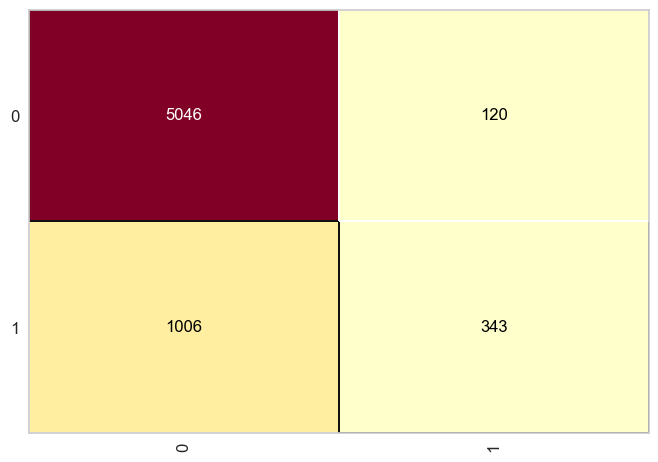

In [69]:
cm = ConfusionMatrix(naive_bayer)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

In [70]:
accuracy_score(predict_NB_o, y_test_o)

0.7774614705016197

0.8940905602455871

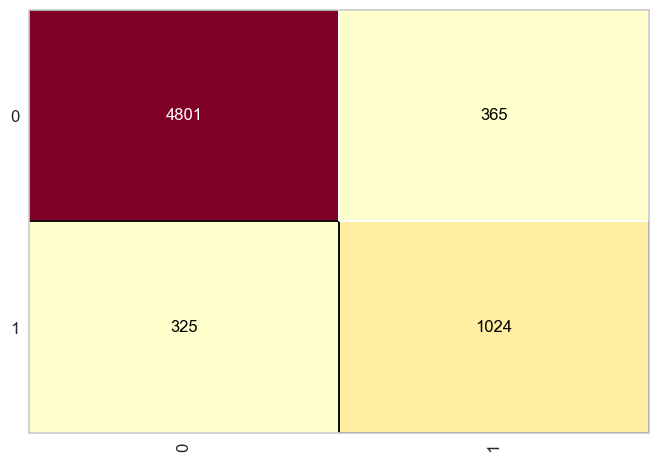

In [71]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

0.9370683039140445

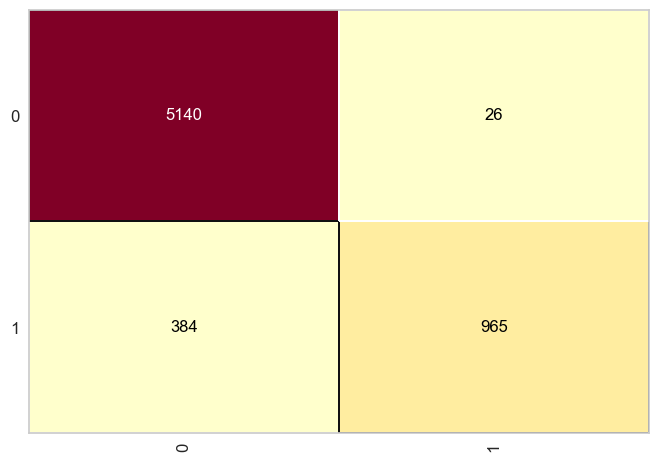

In [72]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

0.8922486569455104

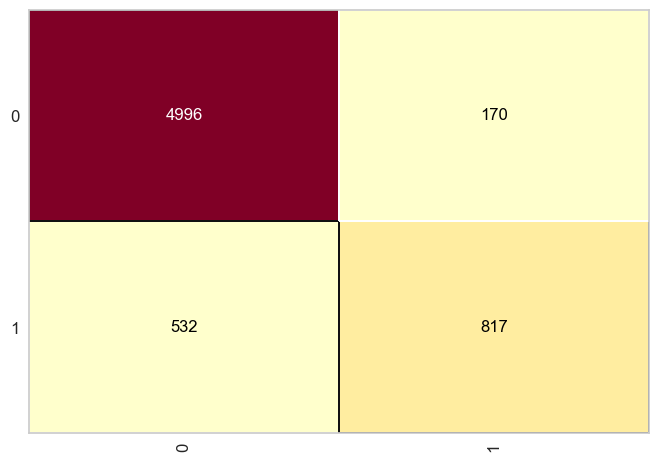

In [73]:
cm = ConfusionMatrix(knn)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

0.8726016884113584

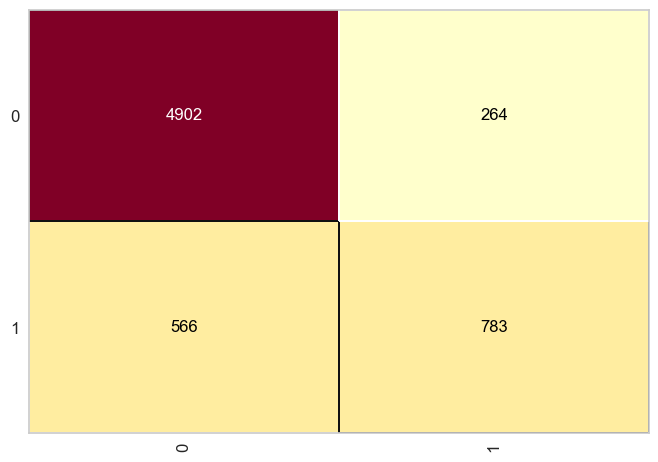

In [74]:
cm = ConfusionMatrix(logistic)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

0.9145049884881044

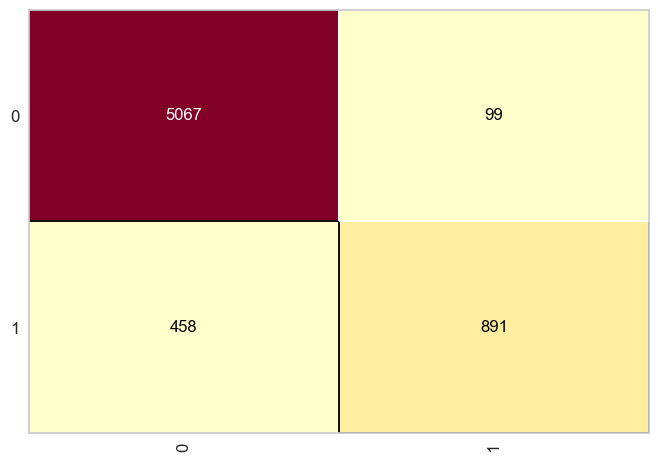

In [75]:
cm = ConfusionMatrix(svm)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)

0.913584036838066

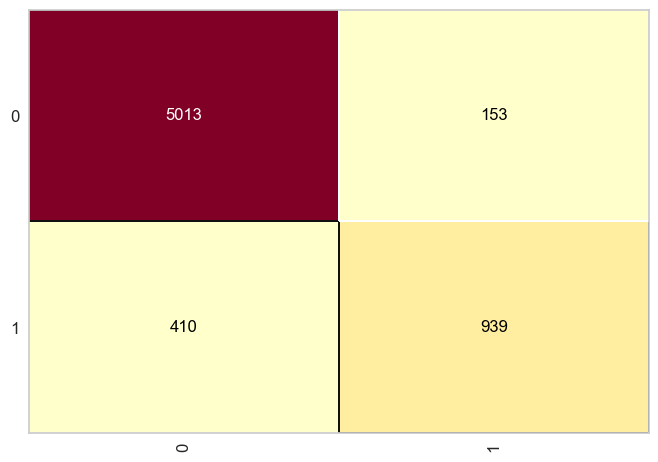

In [77]:
cm = ConfusionMatrix(neural_network)
cm.fit(X_training, y_training)
cm.score(X_test, y_test)